The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

In [2]:
import json
import requests
import pprint
import urllib

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [ ]:
import pandas as pd

food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [ ]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [ ]:
food_paris["adresse"]

0                   12 Rue de Richelieu
1                         7 Rue du Jour
2                     55 Rue Montmartre
3                     85 Rue Montmartre
4                   36 Rue Poissonnière
5                   29 Rue des Jeuneurs
6                  214 Rue Saint-Martin
7                    33 Bd Beaumarchais
8                   10 Rue des Archives
9                    60 Rue Quincampoix
10                        11 Rue Mandar
11                      29 Rue Mazarine
12               157 Bd du Montparnasse
13             65 Av. de la Bourdonnais
14     127 Rue du Faubourg Saint-Honoré
15                     59 Rue la Boétie
16         48 Rue Notre Dame de Lorette
17                      13 Bd Haussmann
18               24 Rue Pierre Fontaine
19                        10 Rue Richer
20                   25 Rue Yves Toudic
21                        11 Rue Bichat
22            12 R. des Petites Écuries
23     140 Rue du Faubourg Poissonnière
24    217 Rue du Faubourg Saint-Antoine


In [ ]:
url = "https://api-adresse.data.gouv.fr/search/?q=12+Rue+de+Richelieu&postcode=75001"

In [ ]:
url

'https://api-adresse.data.gouv.fr/search/?q=12+Rue+de+Richelieu&postcode=75001'

In [ ]:
response = requests.get(url)

In [ ]:
json = response.json()
json

{'type': 'FeatureCollection',
 'version': 'draft',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.336258, 48.864374]},
   'properties': {'label': '12 Rue de Richelieu 75001 Paris',
    'score': 0.9661545454545454,
    'housenumber': '12',
    'id': '75101_8212_00012',
    'name': '12 Rue de Richelieu',
    'postcode': '75001',
    'citycode': '75101',
    'x': 651306.61,
    'y': 6862909.38,
    'city': 'Paris',
    'district': 'Paris 1er Arrondissement',
    'context': '75, Paris, Île-de-France',
    'type': 'housenumber',
    'importance': 0.6277,
    'street': 'Rue de Richelieu'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.336521, 48.864671]},
   'properties': {'label': 'Passage de Richelieu 75001 Paris',
    'score': 0.48719272727272717,
    'id': '75101_8211',
    'name': 'Passage de Richelieu',
    'postcode': '75001',
    'citycode': '75101',
    'x': 651326.18,
    'y': 6862942.24,
    'city': 'Paris',
    'di

In [ ]:
json['features'][1]['geometry']['coordinates']

[2.336521, 48.864671]

In [ ]:
def geocode_address(address):
    url = f"https://api-adresse.data.gouv.fr/search/?q={address}"
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200 and data.get('features'):

        location = data['features'][0]['geometry']['coordinates']
        return location[1], location[0]
    else:
        return None

addresses = [ "12 Rue de Richelieu",
              "7 Rue du Jour",
              "55 Rue Montmartre",
              "85 Rue Montmartre",
              "36 Rue Poissonnière",
              "29 Rue des Jeuneurs",
            "214 Rue Saint-Martin",
            "33 Bd Beaumarchais",
           "10 Rue des Archives",
            "60 Rue Quincampoix",
           "11 Rue Mandar",
           "29 Rue Mazarine",
           "157 Bd du Montparnasse",
           "65 Av. de la Bourdonnais",
           "127 Rue du Faubourg Saint-Honoré",
           "59 Rue la Boétie",
           "48 Rue Notre Dame de Lorette",
          "13 Bd Haussmann",
           "24 Rue Pierre Fontaine",
           "10 Rue Richer",
           "25 Rue Yves Toudic",
           "11 Rue Bichat",
           "12 R. des Petites Écuries",
           "140 Rue du Faubourg Poissonnière",
           "217 Rue du Faubourg Saint-Antoine",
           "71 Rue Jean-Pierre Timbaud",
           "53 Rue du Faubourg Saint-Antoine",
          "34 Rue du Moulin Vert",
           "47 Rue des Moines"]

results = []

for address in addresses:
    coordinates = geocode_address(address)
    if coordinates:
        results.append({'Adresse': address, 'Latitude': coordinates[0], 'Longitude': coordinates[1]})
    else:
        results.append({'Adresse': address, 'Latitude': None, 'Longitude': None})

df = pd.DataFrame(results)


In [ ]:
df.rename(columns = {"Adresse": "adresse"}, inplace = True)
df

,adresse,Latitude,Longitude
0,12 Rue de Richelieu,48.960541,2.585962
1,7 Rue du Jour,48.740750,2.303353
2,55 Rue Montmartre,48.865983,2.344484
3,85 Rue Montmartre,48.867596,2.343757
4,36 Rue Poissonnière,48.869951,2.347940
5,29 Rue des Jeuneurs,48.869541,2.344421
6,214 Rue Saint-Martin,48.863752,2.352870
7,33 Bd Beaumarchais,48.932462,2.288185
8,10 Rue des Archives,50.643471,3.060316
9,60 Rue Quincampoix,48.861576,2.350820


In [ ]:
df_final = pd.merge(df, food_paris, on='adresse', how='inner')

In [ ]:
df_final

,adresse,Latitude,Longitude,nom,code postal
0,12 Rue de Richelieu,48.960541,2.585962,Kodawari Tsukiji,75001 Paris
1,7 Rue du Jour,48.740750,2.303353,Café Lai’Tcha,75001 Paris
2,55 Rue Montmartre,48.865983,2.344484,Pizz'Aria,75002 Paris
3,85 Rue Montmartre,48.867596,2.343757,M La Vie,75002 Paris
4,36 Rue Poissonnière,48.869951,2.347940,Road Trip,75002 Paris
5,29 Rue des Jeuneurs,48.869541,2.344421,Rolls,75002 Paris
6,214 Rue Saint-Martin,48.863752,2.352870,Qasti Shawarma,75003 Paris
7,33 Bd Beaumarchais,48.932462,2.288185,The Brooklyn Pizzeria,75003 Paris
8,10 Rue des Archives,50.643471,3.060316,La Baguette du relais,75004 Paris
9,60 Rue Quincampoix,48.861576,2.350820,Olive & Thym,75004 Paris


# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [ ]:
import folium

In [ ]:
map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)


for index, row in df_final.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row[['adresse', 'nom', 'code postal']]).add_to(map)


map.save('map.html')

In [ ]:
map

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [ ]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

In [ ]:
len(df_restaurants['text'][0])

889

In [ ]:
df_restaurants['len_text'] = df_restaurants['text'].apply(lambda x: len(x))



In [ ]:
df_restaurants

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad,880


In [ ]:
import matplotlib.pyplot as plt

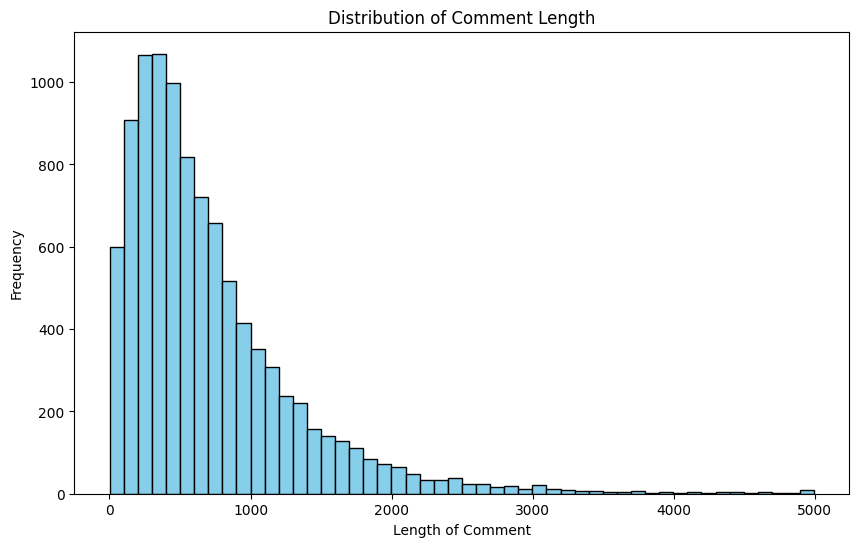

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_restaurants['len_text'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Length')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()

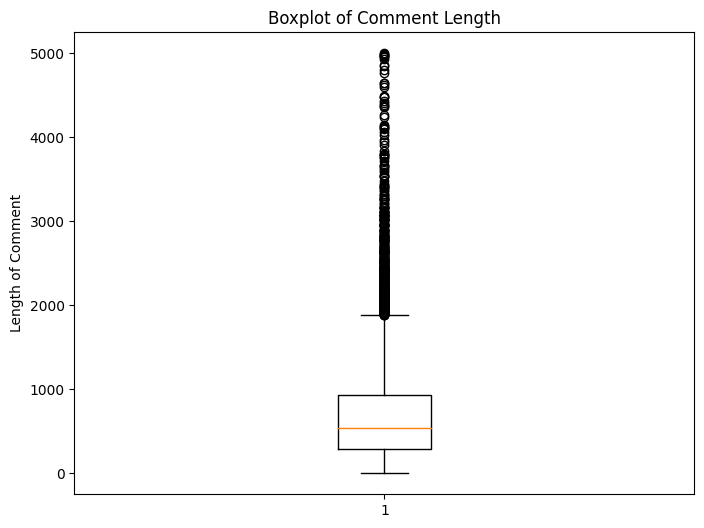

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_restaurants['len_text'])
plt.title('Boxplot of Comment Length')
plt.ylabel('Length of Comment')
plt.show()

## Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?


La plus part des commentaires 0 et 1000 mots.


## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



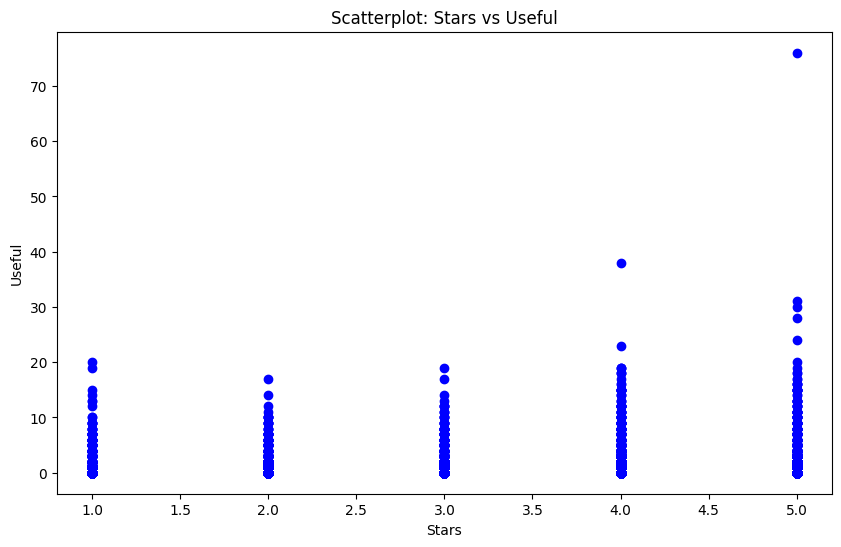

Correlation Coefficient: -0.023478955127693917


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['stars'], df_restaurants['useful'], color='blue')
plt.title('Scatterplot: Stars vs Useful')
plt.xlabel('Stars')
plt.ylabel('Useful')
plt.show()


correlation_coefficient = df_restaurants['stars'].corr(df_restaurants['useful'])
print(f'Correlation Coefficient: {correlation_coefficient}')

il y a peu ou pas de relation linéaire entre les deux variables. La colonne 'useful' n'influence pas la notation des "Stars"


# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [ ]:
df_restaurants

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad,880


In [ ]:
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def func_clean(text):

    no_punct_text = re.sub(r'[^\w\s]+', '', text)


    tokens = word_tokenize(no_punct_text)


    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


    filtered_sentence = ' '.join(filtered_tokens)

    return filtered_sentence


## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [ ]:
X_clean = X.apply(func_clean)

In [ ]:
X_clean

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate Rice good also dig candy selec...
3       Rosie Dakota LOVE Chaparral Dog Park convenien...
4       General Manager Scott Petello good egg go deta...
                              ...                        
9995    First visitHad lunch today used Groupon ordere...
9996    called house deliciousness could go item item ...
9997    recently visited Olive Ivy business last week ...
9998    nephew moved Scottsdale recently bunch friends...
9999    45 locations 45 star average think Arizona rea...
Name: text, Length: 10000, dtype: object

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size = 0.2, random_state = 32)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000,)
X_test shape: (2000,)
y_train shape: (8000,)
y_test shape: (2000,)


## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()


X_train_vecto = tfidf_vectorizer.fit_transform(X_train)


X_test_vecto = tfidf_vectorizer.transform(X_test)

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logreg_model = LogisticRegression(random_state=32)


logreg_model.fit(X_train_vecto, y_train)
y_train_pred = logreg_model.predict(X_train_vecto)
y_test_pred = logreg_model.predict(X_test_vecto)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")

tn_count = conf_matrix[0, 0]
print(f"\nNumber of 'bad' comments correctly predicted (True Negatives): {tn_count}")


classification_rep = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(classification_rep)


Training Accuracy: 0.898875
Test Accuracy: 0.8335

Confusion Matrix:

Number of 'bad' comments correctly predicted (True Negatives): 356

Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.58      0.68       610
        good       0.84      0.94      0.89      1390

    accuracy                           0.83      2000
   macro avg       0.83      0.76      0.78      2000
weighted avg       0.83      0.83      0.82      2000



Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Oui l"accuracy scores pour le training set est overfit comparé à celui du test.


## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=32)


decision_tree_model.fit(X_train_vecto, y_train)
y_train_pred = decision_tree_model.predict(X_train_vecto)


y_test_pred = decision_tree_model.predict(X_test_vecto)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.673


## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





# Part 4 : `JSON` manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [4]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [7]:
food["clé1"]["fruit1"]

'pomme'

In [11]:
fruits_list = []
vegetables_list = []

for key in food.keys():
    if key == "clé1":
        fruits_list.append(food[key]["fruit1"])
        vegetables_list.append(food[key]["légume4"])
    if key == "clé2":
      vegetables_list.append(food[key]["légume1"])
      vegetables_list.append(food[key]["légume3"])
      fruits_list.append(food[key]["fruit5"])
    if key == "clé3":
      fruits_list.append(food[key]["niveau1"]["niveau2"]["fruit3"])
      vegetables_list.append(food[key]["niveau1"]["niveau2"]["légume5"])
      fruits_list.append(food[key]["niveau1"]["niveau2"]["fruit5"])
    if key == "clé4":
      fruits_list.append(food[key]["niveau1"]["niveau2"]['niveau3']["fruit6"])
      fruits_list.append(food[key]["niveau1"]["niveau2"]['niveau3']["fruit7"])
      vegetables_list.append(food[key]['niveau1']["niveau2"]['niveau3']["légume4"])
      fruits_list.append(food[key]["niveau1"]["niveau2"]['niveau3']["fruit2"])






print("Fruits List:", fruits_list)
print("Vegetables List:", vegetables_list)


Fruits List: ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']
Vegetables List: ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']


In [ ]:
fruits_list

[]

Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [12]:
food_dict = {'fruits' : fruits_list, 'legumes': vegetables_list}
food_dict





{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}